##   Comparing Decision Tree, Random Forest, and Naive Bayes Models for Vehicle Insurance Fraud Detection

This project involves implementing and comparing three different machine learning models—Decision Tree, Random Forest, and Naive Bayes—to predict whether an insurance claim is fraudulent (`fraud_reported`) based on various features from the dataset.


In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("./InsuranceFraud.xlsx")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


## Data Overview

The dataset contains information about insurance claims, with 39 columns representing different attributes related to policy details, the insured individual, and the incident. The target variable is `fraud_reported`, which indicates whether a claim was reported as fraud (`Y`) or not (`N`).


In [3]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

### Key Features:
- **Policy Information**: `policy_number`, `policy_state`, `policy_csl`, `policy_deductable`, etc.
- **Insured Details**: `insured_sex`, `insured_education_level`, `insured_occupation`, `insured_hobbies`, etc.
- **Incident Information**: `incident_date`, `incident_type`, `collision_type`, `incident_severity`, etc.
- **Vehicle Information**: `auto_make`, `auto_model`, `auto_year`

In [4]:
df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [5]:
df["authorities_contacted"].describe()

count        909
unique         4
top       Police
freq         292
Name: authorities_contacted, dtype: object

## Data Preprocessing
In this step, columns that are irrelevant or have high cardinality (e.g., `policy_number`, `insured_zip`) are removed to improve model performance. Additionally, categorical variables are encoded, and missing values (if any) are handled to prepare the data for modeling.

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           909 non-null    int64         
 1   age                          909 non-null    int64         
 2   policy_number                909 non-null    int64         
 3   policy_bind_date             909 non-null    datetime64[ns]
 4   policy_state                 909 non-null    object        
 5   policy_csl                   909 non-null    object        
 6   policy_deductable            909 non-null    int64         
 7   policy_annual_premium        909 non-null    float64       
 8   umbrella_limit               909 non-null    int64         
 9   insured_zip                  909 non-null    int64         
 10  insured_sex                  909 non-null    object        
 11  insured_education_level      909 non-null    objec

In [8]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y


In [9]:
df["police_report_available"].unique()

array(['YES', '?', 'NO'], dtype=object)

In [10]:
df.drop(df[df["police_report_available"]=='?'].index, inplace=True)

In [11]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N


In [12]:
df["policy_state"].unique()

array(['OH', 'IL', 'IN'], dtype=object)

<Axes: >

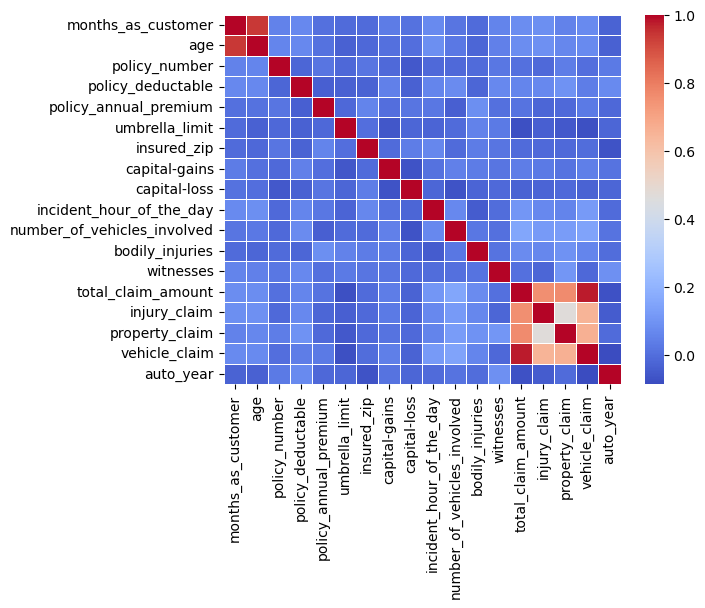

In [13]:
corr = df.select_dtypes(["int","float"]).corr()
sns.heatmap(corr, cmap="coolwarm", linewidth=0.5)

In [15]:
df.drop(columns=['months_as_customer','vehicle_claim'])

,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,fraud_reported
0,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,1,2,YES,71610,6510,13020,Saab,92x,2004,Y
2,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,2,3,NO,34650,7700,3850,Dodge,RAM,2007,N
3,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,1,2,NO,63400,6340,6340,Chevrolet,Tahoe,2014,Y
5,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,FEMALE,...,0,2,NO,64100,6410,6410,Saab,95,2003,Y
7,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,MALE,...,2,2,YES,51590,9380,9380,Audi,A5,2015,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,43,663190,1994-02-05,IL,100/300,500,1564.43,3000000,477644,FEMALE,...,2,2,YES,34290,3810,3810,Jeep,Grand Cherokee,2013,N
991,44,109392,2006-07-12,OH,100/300,1000,1280.88,0,433981,MALE,...,0,1,NO,46980,0,5220,Accura,TL,2002,N
992,26,215278,2007-10-24,IN,100/300,500,722.66,0,433696,MALE,...,1,2,YES,36700,3670,7340,Nissan,Pathfinder,2010,N
997,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,2,3,YES,67500,7500,7500,Suburu,Impreza,1996,N


In [16]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N


In [17]:
df['property_damage'].unique()

array(['YES', 'NO', '?'], dtype=object)

In [18]:
df["property_damage"][df["property_damage"]=='?'].count()

215

In [19]:
df.drop(df[df["property_damage"]=='?'].index, inplace=True)

In [20]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
11,447,61,214618,1999-05-29,OH,100/300,2000,1137.16,0,615561,...,2,YES,114920,17680,17680,79560,Audi,A3,2006,N


#### Removing Unwanted Columns

In [21]:
df.drop(columns=['policy_number','policy_csl','insured_zip','auto_model','auto_year','incident_location'], inplace=True)

In [22]:

df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,328,48,2014-10-17,OH,1000,1406.91,0,MALE,MD,craft-repair,...,YES,1,2,YES,71610,6510,13020,52080,Saab,Y
2,134,29,2000-09-06,OH,2000,1413.14,5000000,FEMALE,PhD,sales,...,NO,2,3,NO,34650,7700,3850,23100,Dodge,N
5,256,39,2006-10-12,OH,1000,1351.10,0,FEMALE,PhD,tech-support,...,NO,0,2,NO,64100,6410,6410,51280,Saab,Y
8,27,33,1997-02-05,IL,500,1442.99,0,FEMALE,PhD,other-service,...,NO,1,1,YES,27700,2770,2770,22160,Toyota,N
11,447,61,1999-05-29,OH,2000,1137.16,0,FEMALE,High School,exec-managerial,...,YES,1,2,YES,114920,17680,17680,79560,Audi,N


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378 entries, 0 to 992
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           378 non-null    int64         
 1   age                          378 non-null    int64         
 2   policy_bind_date             378 non-null    datetime64[ns]
 3   policy_state                 378 non-null    object        
 4   policy_deductable            378 non-null    int64         
 5   policy_annual_premium        378 non-null    float64       
 6   umbrella_limit               378 non-null    int64         
 7   insured_sex                  378 non-null    object        
 8   insured_education_level      378 non-null    object        
 9   insured_occupation           378 non-null    object        
 10  insured_hobbies              378 non-null    object        
 11  insured_relationship         378 non-null    objec

In [24]:
df.drop(columns=['incident_date','policy_bind_date'], inplace =True)

In [26]:
for col in df.columns:
    if df[col].dtype=="object":
        print(f"{col} have unique values : {df[col].unique()}")

policy_state have unique values : ['OH' 'IL' 'IN']
insured_sex have unique values : ['MALE' 'FEMALE']
insured_education_level have unique values : ['MD' 'PhD' 'High School' 'College' 'Masters' 'JD' 'Associate']
insured_occupation have unique values : ['craft-repair' 'sales' 'tech-support' 'other-service' 'exec-managerial'
 'protective-serv' 'machine-op-inspct' 'transport-moving' 'prof-specialty'
 'adm-clerical' 'handlers-cleaners' 'armed-forces' 'farming-fishing'
 'priv-house-serv']
insured_hobbies have unique values : ['sleeping' 'board-games' 'bungie-jumping' 'golf' 'skydiving' 'reading'
 'movies' 'yachting' 'paintball' 'kayaking' 'polo' 'basketball' 'hiking'
 'video-games' 'chess' 'cross-fit' 'exercise' 'dancing' 'camping'
 'base-jumping']
insured_relationship have unique values : ['husband' 'own-child' 'unmarried' 'other-relative' 'wife' 'not-in-family']
incident_type have unique values : ['Single Vehicle Collision' 'Multi-vehicle Collision' 'Parked Car'
 'Vehicle Theft']
collision

## Label Encoding of categorical columns

In [35]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
columns=['policy_state', 'insured_sex', 'insured_education_level',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make',
       'fraud_reported',"incident_state","insured_occupation","insured_hobbies"]
for col in columns:
    df[col] = encoder.fit_transform(df[col])



In [36]:
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,fraud_reported
0,328,48,2,1000,1406.91,0,1,4,2,17,...,1,1,2,1,71610,6510,13020,52080,10,1
2,134,29,2,2000,1413.14,5000000,0,6,11,2,...,0,2,3,0,34650,7700,3850,23100,4,0
5,256,39,2,1000,1351.10,0,0,6,12,3,...,0,0,2,0,64100,6410,6410,51280,10,1
8,27,33,0,500,1442.99,0,0,6,7,9,...,0,1,1,1,27700,2770,2770,22160,12,0
11,447,61,2,2000,1137.16,0,0,2,3,16,...,1,1,2,1,114920,17680,17680,79560,1,0


In [37]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['fraud_reported'])
y = df["fraud_reported"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)


## 1. Decision Tree Algorithm

In [38]:
from sklearn.metrics import accuracy_score 

Dtree = DecisionTreeClassifier(max_depth=4)

Dtree.fit(X_train, y_train)

y_pred = Dtree.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)

print("Accuracy : ", accuracy)



Accuracy :  0.8508771929824561


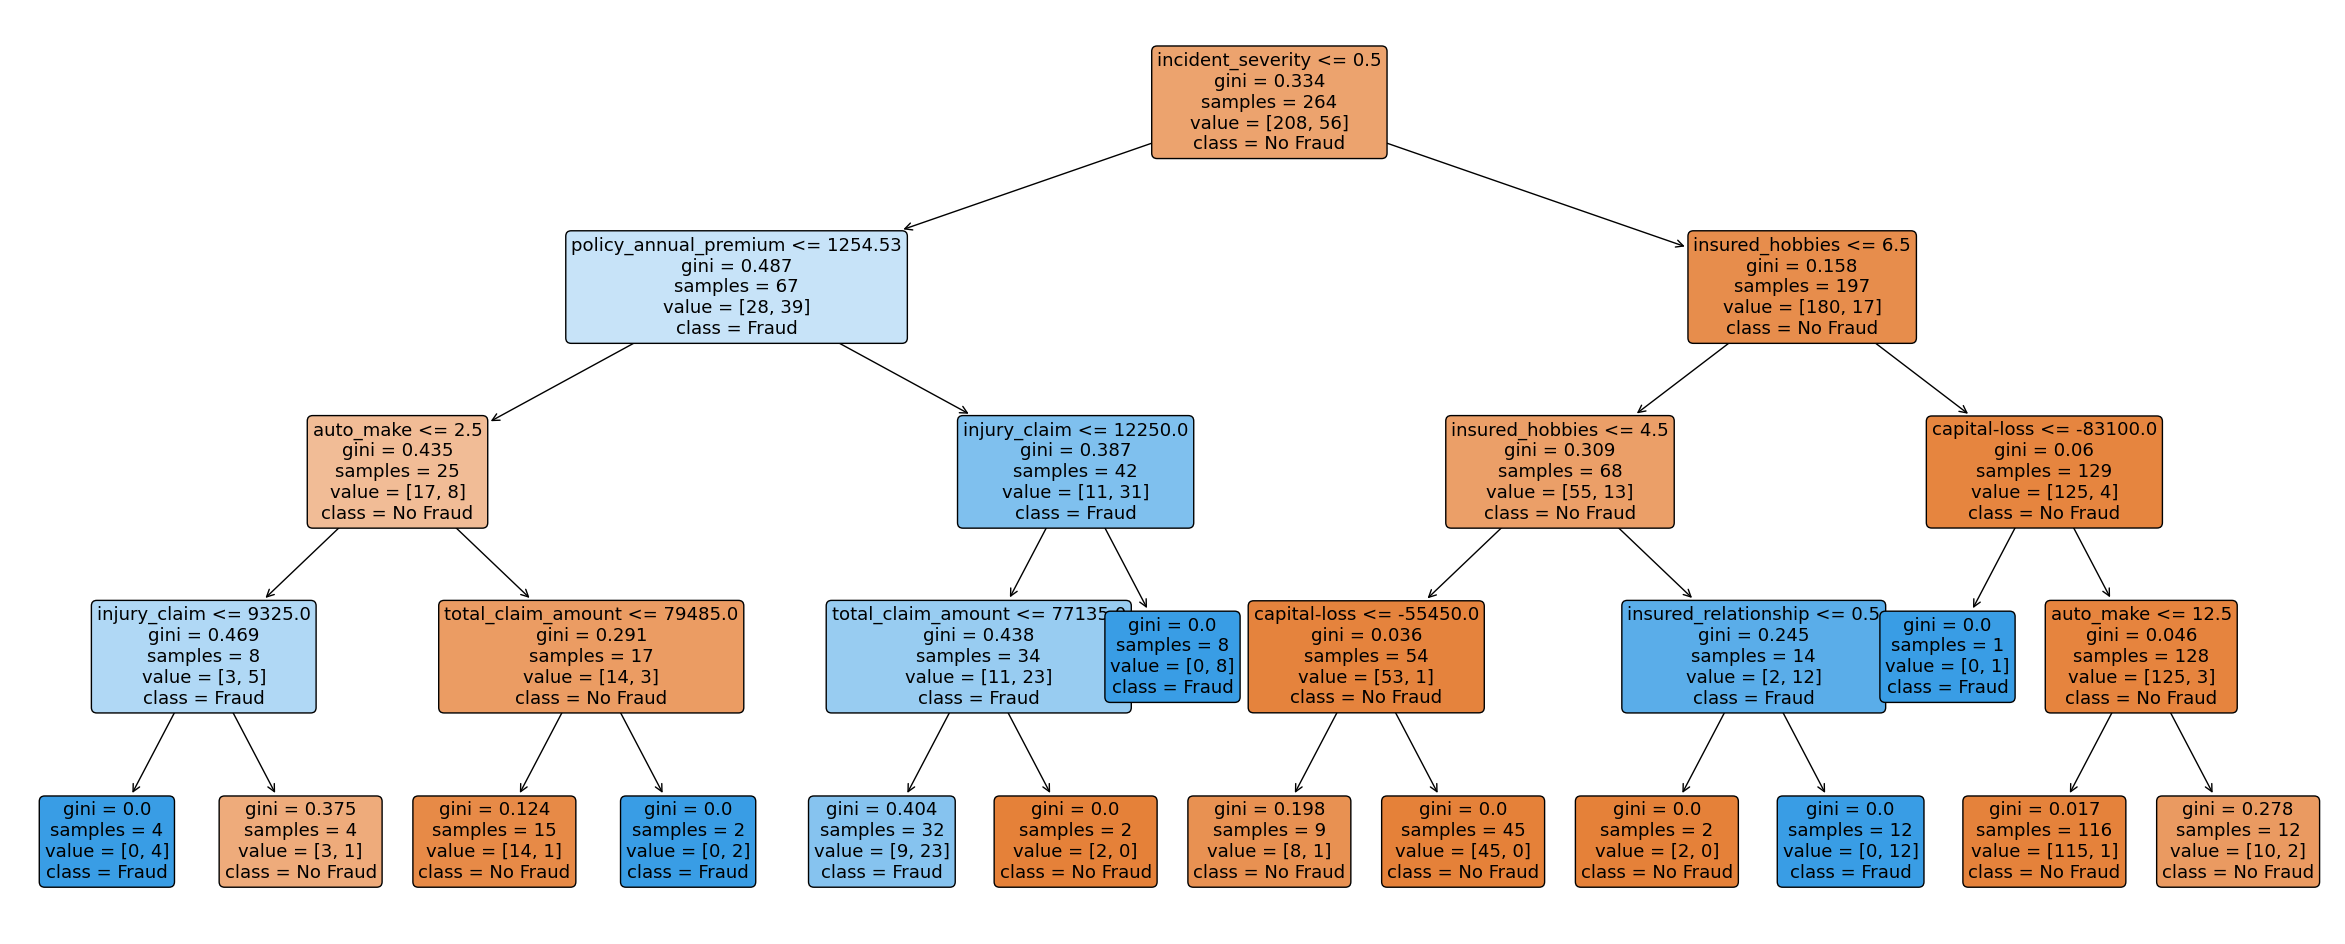

In [39]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 12))
plot_tree(Dtree, feature_names=X.columns.tolist(), class_names=['No Fraud', 'Fraud'], filled=True, rounded=True, fontsize=13)
plt.show()

## 2. Random Forest Algorithm

In [32]:

def RandomForest(n):
    RForest = RandomForestClassifier(n_estimators= n, random_state=42)

    RForest.fit(X_train, y_train)

    y_pred = RForest.predict(X_test)

    accuracy = accuracy_score(y_pred, y_test)

    print(f"Accuracy at {n} estimators : {accuracy} ")


In [40]:
n=[10, 20, 50, 100, 150, 200]
for i in n:
    RandomForest(i)

Accuracy at 10 estimators : 0.7719298245614035 
Accuracy at 20 estimators : 0.7894736842105263 
Accuracy at 50 estimators : 0.7631578947368421 
Accuracy at 100 estimators : 0.7368421052631579 
Accuracy at 150 estimators : 0.7280701754385965 
Accuracy at 200 estimators : 0.7280701754385965 


In [88]:
# RandomForest has high accuracy at 20 estimatores
RandomForest(20)

Accuracy at 20 estimators : 0.8070175438596491 


## 3. Naive Bayes Algorithm

In [41]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.69
